# Animation of the PSF of interferometers

_M Kenworthy_ Leiden Observatory kenworthy@strw.leidenuniv.nl

Based on hcipy tutorials https://docs.hcipy.org/0.3.1/tutorials/index.html and examples, and http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/


In [ ]:
#pip install progressbar2

In [ ]:
#pip install ffpmeg

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hcipy import *
from scenes import *

from tqdm.notebook import tqdm,trange 

anim_version='v1'

In [2]:
from matplotlib import animation, rc
#from IPython.display import HTML

/home/sfactor/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  del sys.path[0]


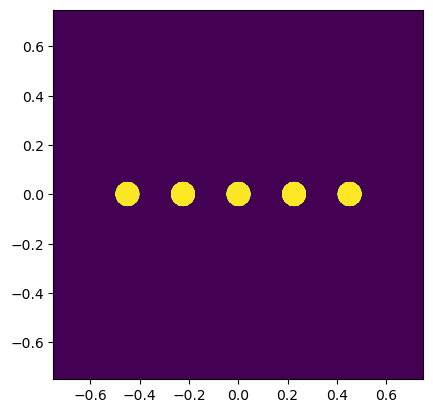

In [3]:
ndish = 5

ddish = .1

dish_x = np.linspace(-0.5+(ddish/2.), 0.5-(ddish/2.), ndish)

dish_y = np.zeros_like(dish_x)

interf_array = UnstructuredCoords((dish_x,dish_y))

grid = Grid(interf_array)

dish = circular_aperture(ddish) # this is a Field generator

interferom = make_segmented_aperture(dish, grid, np.array([1.0]))

pupil_grid = make_pupil_grid(1024,1.5)
inter_pupil = evaluate_supersampled(interferom, pupil_grid, 8)

imshow_field(inter_pupil)

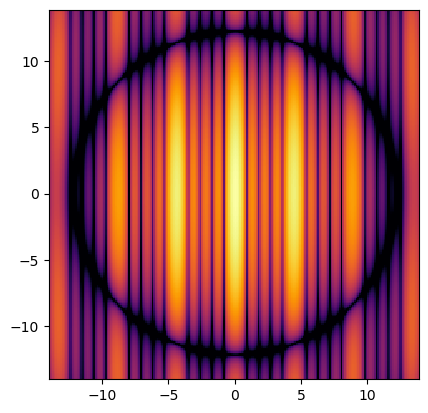

In [4]:
focal_grid = make_focal_grid(8, 14)

prop = FraunhoferPropagator(inter_pupil, focal_grid)

wf = Wavefront(inter_pupil)
focal_image = prop(wf).intensity
imshow_field(np.log10(focal_image / focal_image.max()), vmin=-5, cmap='inferno')

/home/sfactor/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  # This is added back by InteractiveShellApp.init_path()


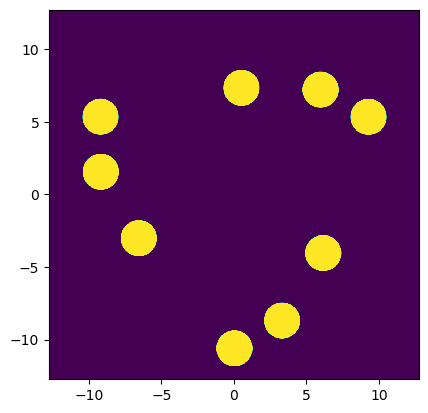

In [9]:
ddish=2.5

dish_x = np.array([0.479693,5.92876,9.22833,6.10974,3.27305,-0.00344277,-6.58844,-9.20181,-9.22491])

dish_y = np.array([7.3313,7.20237,5.32402,-4.0802,-8.73564,-10.654,-3.05110,1.53327,5.32998])

interf_array = UnstructuredCoords((dish_x,dish_y))

grid = Grid(interf_array)

dish = circular_aperture(ddish) # this is a Field generator

interferom = make_segmented_aperture(dish, grid, np.array([1.0]))

pupil_grid = make_pupil_grid(1024,25.5)
inter_pupil = evaluate_supersampled(interferom, pupil_grid, 8)

imshow_field(inter_pupil)

In [18]:
# plt.imshow(np.fft.fft(
inter_pupil

Field([0., 0., 0., ..., 0., 0., 0.])

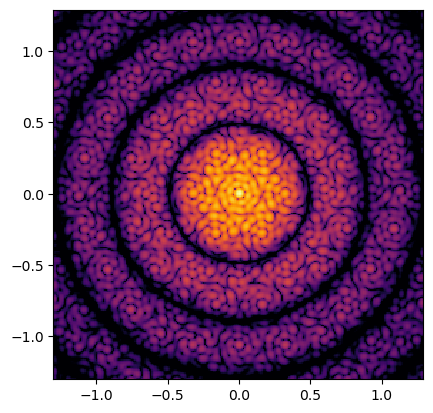

In [23]:
focal_grid = make_focal_grid(100, 1.3)

prop = FraunhoferPropagator(inter_pupil, focal_grid)

wf = Wavefront(inter_pupil)
focal_image = prop(wf).intensity
imshow_field(np.log10(focal_image / focal_image.max()), vmin=-5, cmap='inferno')

## HCIpy setup

15.0


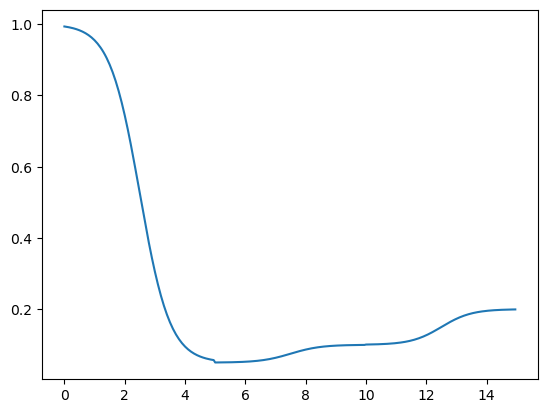

In [24]:
ddish = Stage()
ddish.add(Act(1.0, 0.05, 5,  'sig',10))
ddish.add(Act(0.05, 0.1, 5,  'sig',10))
ddish.add(Act(0.1, 0.2, 5,  'sig',10))

print(ddish.total_time())

t = np.arange(0,ddish.total_time(),0.05)

plt.plot(t, ddish.t(t))

/home/sfactor/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  0%|          | 0/150 [00:00<?, ?it/s]

/home/sfactor/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.


KeyboardInterrupt: 

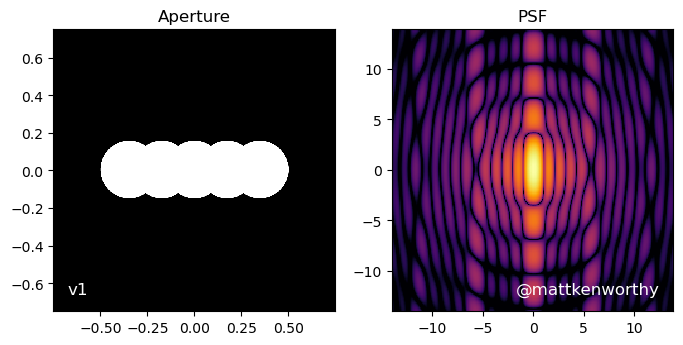

In [25]:
total_time_animation = ddish.total_time() # seconds
frame_rate = 10          # frames per second
total_frames = total_time_animation * frame_rate # seconds
supersampling = 4

plt.figure(figsize=(8,4))

anim = FFMpegWriter('interferometers_{}.mp4'.format(anim_version), framerate=frame_rate)

times = np.arange(0,total_time_animation, 1./frame_rate)

dd = ddish.t(times)

ndish = 5
pupil_grid = make_pupil_grid(1024,1.5)
focal_grid = make_focal_grid(8, 14)

for t in trange(np.int(total_frames)):

    dish = circular_aperture(dd[t]) # this is a Field generator

    dish_x = np.linspace(-0.5+(dd[t]/2.), 0.5-(dd[t]/2.), ndish)

    dish_y = np.zeros_like(dish_x)

    interf_array = UnstructuredCoords((dish_x,dish_y))

    grid = Grid(interf_array)
    
    interferom = make_segmented_aperture(dish, grid, np.array([1.0]))

    inter_pupil = evaluate_supersampled(interferom, pupil_grid, supersampling)

    plt.clf()
#    plt.suptitle('Timestep %d / %d' % (t, total_frames))
    
    plt.subplot(1,2,1)
    imshow_field(inter_pupil, cmap='gray')
    plt.title('Aperture')
    
    plt.text(0.05,0.05,anim_version, fontsize=12, color='white',
            horizontalalignment='left', verticalalignment='bottom',
            transform=plt.gca().transAxes)
    
    prop = FraunhoferPropagator(inter_pupil, focal_grid)

    wf = Wavefront(inter_pupil)
    focal_image = prop(wf).intensity
    
    plt.subplot(1,2,2)
    imshow_field(np.log10(focal_image / focal_image.max()), vmin=-5, cmap='inferno')
    #plt.title('frame {} at time {:.2f}'.format(timestep, timestep/frame_rate))
    plt.title('PSF')

    plt.text(0.95,0.05,"@mattkenworthy", fontsize=12, color='white',
        horizontalalignment='right', verticalalignment='bottom',
        transform=plt.gca().transAxes)
    
    anim.add_frame()

plt.close()
anim.close()

# Show created animation
anim

In [21]:
tmpIds = np.array([[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]],dtype=bool)

In [26]:
total_time_animation = ddish.total_time() # seconds
frame_rate = 10          # frames per second
total_frames = total_time_animation * frame_rate # seconds
supersampling = 4

plt.figure(figsize=(8,4))

anim = FFMpegWriter('interferometers_{}.mp4'.format(anim_version), framerate=frame_rate)

times = np.arange(0,total_time_animation, 1./frame_rate)

dd = ddish.t(times)

ndish = 5
pupil_grid = make_pupil_grid(1024,1.5)
focal_grid = make_focal_grid(8, 14)

for t in trange(np.int(total_frames)):

    dish = circular_aperture(dd[t]) # this is a Field generator

    dish_x = np.linspace(-0.5+(dd[t]/2.), 0.5-(dd[t]/2.), ndish)

    dish_y = np.linspace(-0.5+(dd[t]/2.), 0.5-(dd[t]/2.), ndish)
    
    xx,yy = np.meshgrid(dish_x,dish_y)

    interf_array = UnstructuredCoords((xx[tmpIds].flatten(),yy[tmpIds].flatten()))

    grid = Grid(interf_array)
    
    interferom = make_segmented_aperture(dish, grid, np.array([1.0]))

    inter_pupil = evaluate_supersampled(interferom, pupil_grid, supersampling)

    plt.clf()
#    plt.suptitle('Timestep %d / %d' % (t, total_frames))
    
    plt.subplot(1,2,1)
    imshow_field(inter_pupil, cmap='gray')
    plt.title('Aperture')
    
    plt.text(0.05,0.05,anim_version, fontsize=12, color='white',
            horizontalalignment='left', verticalalignment='bottom',
            transform=plt.gca().transAxes)
    
    prop = FraunhoferPropagator(inter_pupil, focal_grid)

    wf = Wavefront(inter_pupil)
    focal_image = prop(wf).intensity
    
    plt.subplot(1,2,2)
    imshow_field(np.log10(focal_image / focal_image.max()), vmin=-5, cmap='inferno')
    #plt.title('frame {} at time {:.2f}'.format(timestep, timestep/frame_rate))
    plt.title('PSF')

    plt.text(0.95,0.05,"@mattkenworthy", fontsize=12, color='white',
        horizontalalignment='right', verticalalignment='bottom',
        transform=plt.gca().transAxes)
    
    anim.add_frame()

plt.close()
anim.close()

# Show created animation
anim

/home/sfactor/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  0%|          | 0/150 [00:00<?, ?it/s]

/home/sfactor/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.


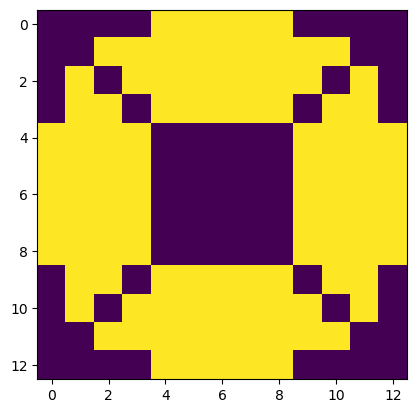

In [26]:
r0=[0]*4+[1]*5+[0]*4
r1=[0]*2+[1]*9+[0]*2
r2=[0,1,0]+[1]*7+[0,1,0]
r3=[0,1,1,0]+[1]*5+[0,1,1,0]
r4=[1]*4+[0]*5+[1]*4
tmpIds = np.array([r0,r1,r2,r3,r4,r4,r4,r4,r4,r3,r2,r1,r0],dtype=bool)
plt.imshow(tmpIds)

15.0


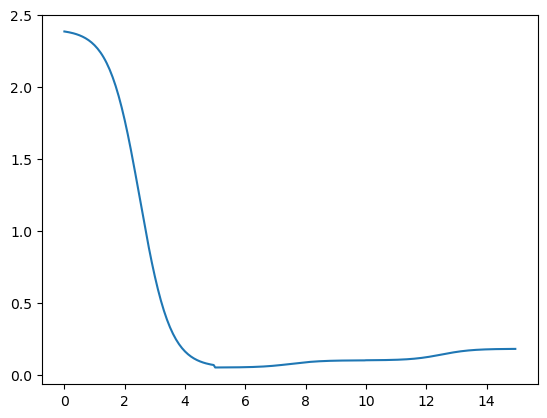

In [27]:
ddish = Stage()
ddish.add(Act(2.4, 0.05, 5,  'sig',10))
ddish.add(Act(0.05, 0.1, 5,  'sig',10))
ddish.add(Act(0.1, 0.18, 5,  'sig',10))

print(ddish.total_time())

t = np.arange(0,ddish.total_time(),0.05)

plt.plot(t, ddish.t(t))

In [30]:
total_time_animation = ddish.total_time() # seconds
frame_rate = 10          # frames per second
total_frames = total_time_animation * frame_rate # seconds
supersampling = 4

plt.figure(figsize=(8,4))

anim = FFMpegWriter('interferometers_{}.mp4'.format(anim_version), framerate=frame_rate)

times = np.arange(0,total_time_animation, 1./frame_rate)

dd = ddish.t(times)

ndish = 13
pupil_grid = make_pupil_grid(1024,3.)
focal_grid = make_focal_grid(20, 14)

for t in trange(np.int(total_frames)):

    dish = circular_aperture(dd[t]) # this is a Field generator

    dish_x = np.linspace(-1.2+(dd[t]/2.), 1.2-(dd[t]/2.), ndish)

    dish_y = np.linspace(-1.2+(dd[t]/2.), 1.2-(dd[t]/2.), ndish)
    
    xx,yy = np.meshgrid(dish_x,dish_y)

    interf_array = UnstructuredCoords((xx[tmpIds].flatten(),yy[tmpIds].flatten()))

    grid = Grid(interf_array)
    
    interferom = make_segmented_aperture(dish, grid, np.array([1.0]))

    inter_pupil = evaluate_supersampled(interferom, pupil_grid, supersampling)

    plt.clf()
#    plt.suptitle('Timestep %d / %d' % (t, total_frames))
    
    plt.subplot(1,2,1)
    imshow_field(inter_pupil, cmap='gray')
    plt.title('Aperture')
    
#     plt.text(0.05,0.05,anim_version, fontsize=12, color='white',
#             horizontalalignment='left', verticalalignment='bottom',
#             transform=plt.gca().transAxes)
    
    prop = FraunhoferPropagator(inter_pupil, focal_grid)

    wf = Wavefront(inter_pupil)
    focal_image = prop(wf).intensity
    
    plt.subplot(1,2,2)
#     imshow_field(np.log10(focal_image / focal_image.max()), vmin=-5, cmap='inferno')
    imshow_field(np.power(focal_image / focal_image.max(),0.5), vmin=0, cmap='inferno')
    #plt.title('frame {} at time {:.2f}'.format(timestep, timestep/frame_rate))
    plt.title('PSF')

#     plt.text(0.95,0.05,"@mattkenworthy", fontsize=12, color='white',
#         horizontalalignment='right', verticalalignment='bottom',
#         transform=plt.gca().transAxes)
    
    anim.add_frame()

plt.close()
anim.close()

# Show created animation
anim

/home/sfactor/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


  0%|          | 0/150 [00:00<?, ?it/s]

/home/sfactor/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.


In [ ]:
!ffmpeg -i interferometers_v1.mp4 -vf "fps=10,scale=400:-1:flags=lanczos" -c:v pam -f image2pipe - | convert -delay 10 - -loop 0 -layers optimize interferometers_v1.gif